# DataPirates_368_384_391

**DATA ANALYTICS ASSIGNMENT (UE19CS312)**

Prediction of Closing Stock Price for Waystar Royco

The aim of this assignment is to analyze the closing stock price of Waystar Royco, given the date, opening price, highest value, lowest value and the volume of the stock. We also have to predict the closing stock price for a given set of inputs by developing various regression and time series models to predict the clsoing stock price given the following features.

We import the necessary libraries required for this assignment

In [28]:
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

'train.csv' is read and converted to a DataFrame for analyzing and training various models

In [29]:
df = pd.read_csv('train.csv')
df.head()

,Date,Open,High,Low,Volume,Close
0,14-08-2015,57.484790,58.398406,57.342469,171718000,58.237720
1,17-08-2015,58.274453,59.013611,58.026536,163538800,58.788651
2,18-08-2015,58.453501,58.917197,58.260678,138242800,58.485638
3,19-08-2015,58.301997,58.494820,57.650069,193146000,57.801575
4,20-08-2015,57.374601,57.498558,56.249794,274006400,56.718082


Using mathplotlib library, we plot a graph to check if there are any trends, seasonality or other features in the training data provided.

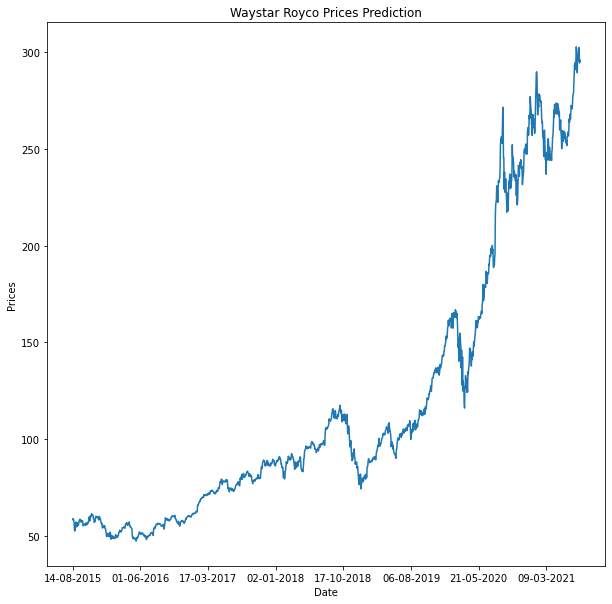

In [30]:
plt.figure(figsize=(10, 10))
plt.plot(df['Date'],df['Close'])
plt.xticks(np.arange(0,1600,200), df.Date[0:1600:200])
plt.title('Waystar Royco Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()

From the above plot, we can infer that:
1. There is an **upward trend**.
2. There is **no seasonality**, as there are no periodic fluctuations.
3. The time-series is **non-stationary**, as over the given period, the mean and variance of "closing prices" keeps fluctuating.

The training data is split into train and test splits to evaluate and compare the various models that we will be developing for the given dataset.

We have set 'shuffle' to 'false' and initilized the random state to obtain consistent results.

In [31]:
x = df[['Open','High','Low','Volume']]
y = df['Close']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1 , shuffle=False, random_state = 0)
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(1350, 4)
(150, 4)
(1350,)
(150,)


# Regression Model

A Linear regression model is built and trained on the training dataset.

In [32]:
regression = LinearRegression()
regression.fit(train_x, train_y)

LinearRegression()

In [33]:
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-5.51248185e-01  8.31565098e-01  7.18946580e-01 -1.06556731e-09]
regression intercept 0.1474214625415442


The trained Linear Regression model is tested on the testing data.

In [34]:
evaluate = regression.predict(test_x)

The accuracy of the **Linear Regression Model** is analysed by calculating Mean Absolute, Mean Squared and Root Mean Squared Error. 

In [35]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, evaluate))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, evaluate))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, evaluate)))

Mean Absolute Error (MAE): 1.299285890788353
Mean Squared Error (MSE) : 3.0833792167304392
Root Mean Squared Error (RMSE): 1.755955357271488


# Time Series Model

For Time series Model, we will be using ARIMA(p=1,d=1,q=1) model to predict the closing stock price.
1. p=1: Yt depends only on 'lag1' of the series.
2. d=1: To make the model stationary, the previous value is subtracted from the current value.
3. q=1: Yt depends only on the first lagged forecast error.

In [36]:
training_data = train_y.values
evaluate_data = test_y.values
history = [x for x in training_data]

model_predictions = []
N_evaluate_observations = len(evaluate_data)

for i in range(N_evaluate_observations):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = evaluate_data[i]
    history.append(true_test_value)

The accuracy of the **ARIMA Model** is analysed by calculating the Mean Absolute, Mean Squared and Root Mean Squared error. 

In [37]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(evaluate_data, model_predictions))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(evaluate_data, model_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(evaluate_data, model_predictions)))

Mean Absolute Error (MAE): 3.451329479490476
Mean Squared Error (MSE) : 19.411590263392828
Root Mean Squared Error (RMSE): 4.405858629528735


We plot a graph to compare the the predictions of both the Linear Regression and Time-Series Model on the evaluation data. 

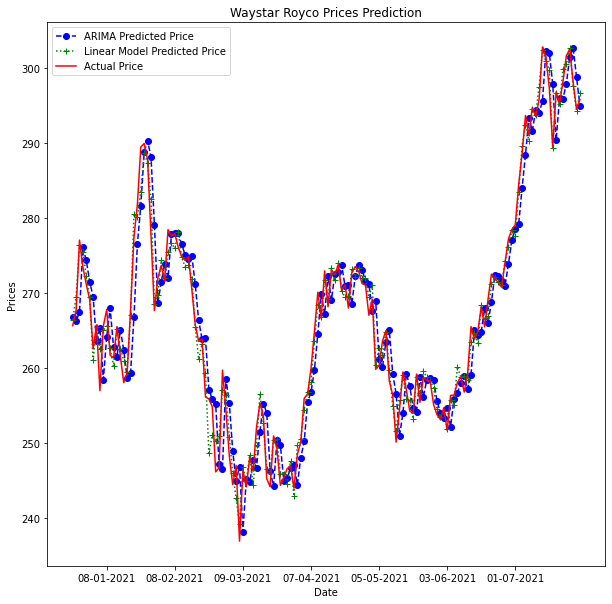

In [38]:
test_set_range = test_x.index
plt.figure(figsize=(10, 10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='ARIMA Predicted Price')
plt.plot(test_set_range, evaluate, color='green', marker='+' , linestyle='dotted', label='Linear Model Predicted Price')
plt.plot(test_set_range, evaluate_data, color='red', label='Actual Price')
plt.title('Waystar Royco Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1360,1500,20), df.Date[1360:1500:20])
plt.legend()
plt.show()

In [39]:
model_predictions = np.dstack(model_predictions)[0][0]
dfr=pd.DataFrame({'Actual_Price':test_y, 'Linear_Regression_Price':evaluate, 'ARIMA_model_Price':model_predictions})
dfr.head(10)

,Actual_Price,Linear_Regression_Price,ARIMA_model_Price
1350,265.695129,266.411774,266.864372
1351,267.705658,269.532020,266.299667
1352,277.101532,276.399875,267.509169
1353,273.478546,275.536474,276.116466
1354,271.189301,272.292832,274.384742
1355,269.138946,269.462470,271.534132
1356,262.609650,261.060765,269.551516
1357,265.794647,265.484605,263.584098
1358,257.015915,262.631229,265.379249
1359,265.615509,265.055667,258.502520


In [40]:
print('Evaluation Metrics For Linear Regression:')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(evaluate, test_y))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(evaluate, test_y))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(evaluate, test_y)))
print()
print('Evaluation Metrics For ARIMA:')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_predictions, test_y))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(model_predictions, test_y))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(model_predictions, test_y)))

Evaluation Metrics For Linear Regression:
Mean Absolute Error (MAE): 1.299285890788353
Mean Squared Error (MSE) : 3.0833792167304392
Root Mean Squared Error (RMSE): 1.755955357271488

Evaluation Metrics For ARIMA:
Mean Absolute Error (MAE): 3.451329479490476
Mean Squared Error (MSE) : 19.411590263392828
Root Mean Squared Error (RMSE): 4.405858629528735


From the above plot and table, we don't observe a significant difference in the predictions but the Linear Regression Model performs slightly better than the ARIMA model.

# Predicting Closing Stock Prices for Test Dataset

'test.csv' is imported and converted to a DataFrame. The dataset is filtered to contain only the required columns for predictions.

In [41]:
test_df = pd.read_csv('test.csv')
test_df = test_df[['Open','High','Low','Volume']]
test_df.head()

,Open,High,Low,Volume
0,293.328006,297.222165,292.788806,70382000
1,297.282094,298.460321,295.065414,62880000
2,296.183715,300.637034,294.925590,64786600
3,299.099384,300.137807,297.122335,56368300
4,298.520228,300.237657,296.902657,46397700


Predicting the closing stock price using **Linear Regression Model** that was already trained.

In [42]:
LR_prediction = regression.predict(test_df)
LR_prediction

array([296.03498343, 296.52966028, 298.84266091, 298.40857602,
       298.66355358, 297.79924819, 297.13007105, 298.2074721 ,
       297.34352197, 301.48466404, 302.57625083, 303.32573808,
       306.05649909, 300.712855  , 299.07486041, 300.55658398,
       304.00397742, 305.68544494, 302.43825801, 301.64619106,
       301.00467608, 309.73402574, 308.40966316, 313.36418659,
       311.88126439, 312.85919319, 317.7423718 , 314.57930136,
       314.65041284, 306.50511782])

Predicting the closing stock price using **ARIMA(1,1,1) Model***.

In [43]:
training_data = df['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = 30
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat[0])
    history.append(LR_prediction[time_point])

We plot a graph to compare the predictions of both the Linear Regression and Arima Model on the testing data provided.

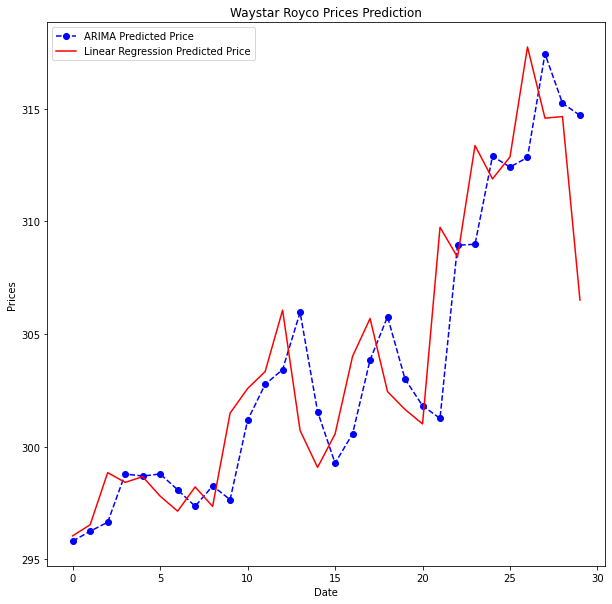

In [44]:
test_set_range = test_df.index
plt.figure(figsize=(10, 10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='ARIMA Predicted Price')
plt.plot(test_set_range, LR_prediction, color='red', label='Linear Regression Predicted Price')
plt.title('Waystar Royco Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [25]:
ARIMA_model_predictions = np.dstack(model_predictions)[0][0]
dfr=pd.DataFrame({'Linear_Regression_Price':LR_prediction, 'ARIMA_model_Price':model_predictions})
dfr.head(10)

,Linear_Regression_Price,ARIMA_model_Price
0,296.034983,295.898964
1,296.529660,296.261370
2,298.842661,296.602148
3,298.408576,298.776718
4,298.663554,298.671606
5,297.799248,298.757165
6,297.130071,298.099399
7,298.207472,297.354232
8,297.343522,298.269982
9,301.484664,297.646432
